## Разложения ошибки на смещение и разброс

<center>Ошибка на новых данных = Шум + Смещение + Разброс, где</center>

ШУМ - ошибка лучшей модели a(x)

СМЕЩЕНИЕ - отклонение усредненных ответов наших моделей от ответов лучшей модели a(x)

РАЗБРОС - дисперсия ответов наших моделей

**Прдемонстрируем низкое смещение (bias) и большой разброс (variance)**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def f(x):
    return 6 - 13 * x - 5 * x ** 2 - 4 * x ** 3

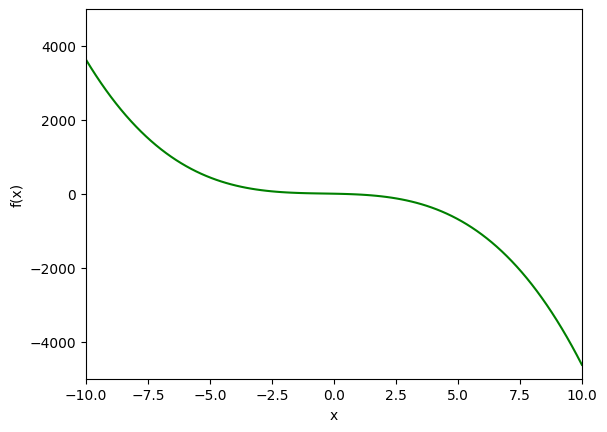

In [ ]:
dots = np.linspace(-10, 10, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g');

In [ ]:
x_datas = []
f_datas = []

for i in range(10):
    x_data = np.random.uniform(-10, 10, 20)
    x_datas.append(x_data)
    f_datas.append([f(i) for i in x_data] + np.random.uniform(-500, 500, 20))

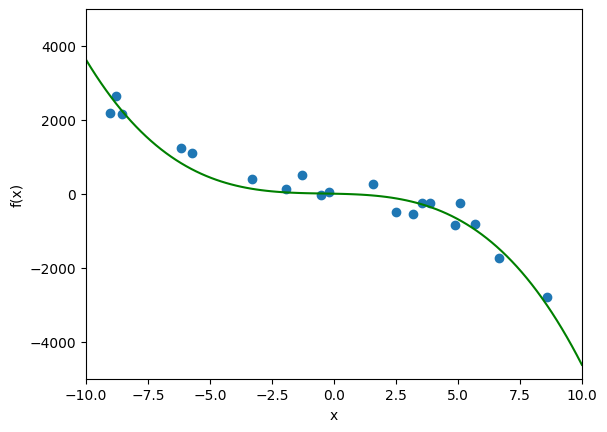

In [ ]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_datas[1], f_datas[1]);

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

regressors = []
for i in range(10):
    # создадим модель
    regressor = DecisionTreeRegressor(random_state=10, max_depth=10)
    # обучим ее
    regressor.fit(np.reshape(x_datas[i], (-1, 1)), f_datas[i])
    regressors.append(regressor)

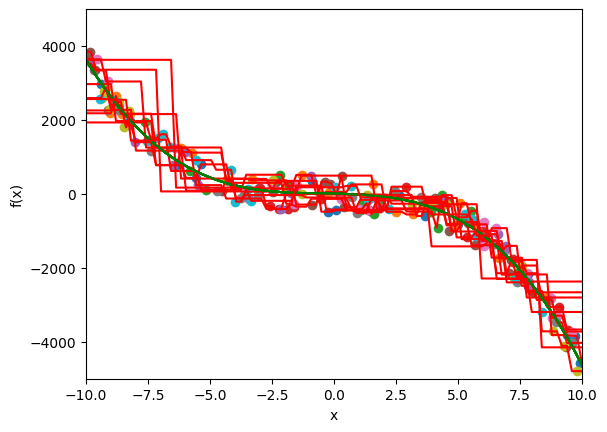

In [ ]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

predictions = []
for i in range(10):
    plt.plot(dots, f(dots), color='g')
    plt.scatter(x_datas[i], f_datas[i])
    prediction = regressors[i].predict(np.reshape(dots, (-1, 1)))
    predictions.append(prediction)
    plt.plot(dots, prediction, color='r');
predictions = np.array(predictions)

In [ ]:
mean_prediction = np.mean(predictions, axis=0)

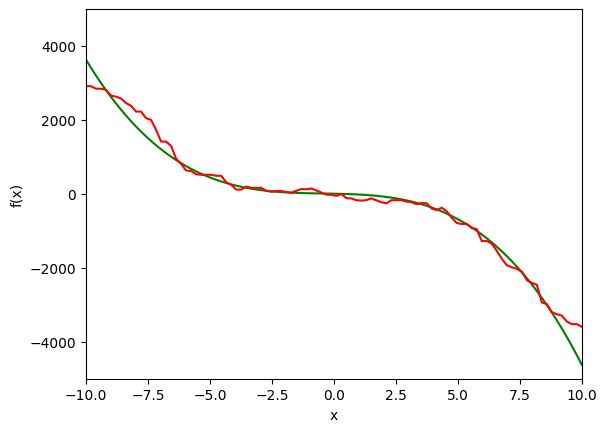

In [ ]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g')
plt.plot(dots, mean_prediction, color='r');

**Прдемонстрируем высокое смещение (bias) и низкий разброс (variance)**

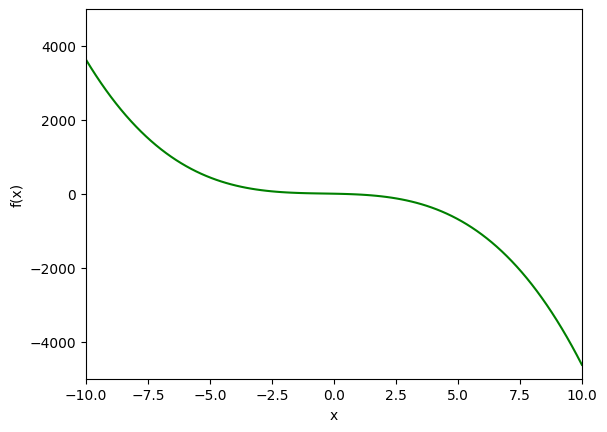

In [ ]:
dots = np.linspace(-10, 10, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g');

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

regressors = []
for i in range(10):
    # создадим модель
    regressor = LinearRegression()

    # обучим ее
    regressor.fit(np.reshape(x_datas[i], (-1, 1)), f_datas[i])
    regressors.append(regressor)

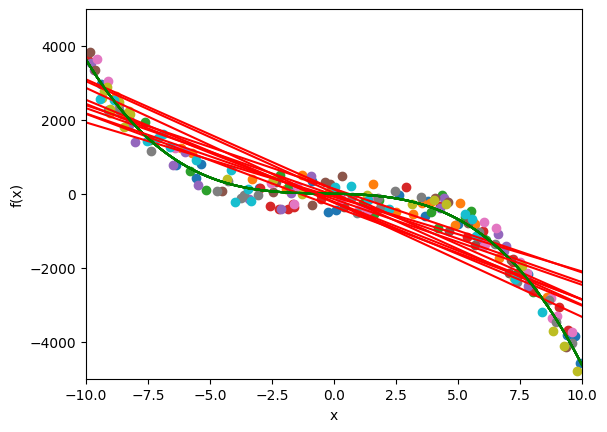

In [ ]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

predictions = []
for i in range(10):
    plt.plot(dots, f(dots), color='g')
    plt.scatter(x_datas[i], f_datas[i])
    prediction = regressors[i].predict(np.reshape(dots, (-1, 1)))
    predictions.append(prediction)
    plt.plot(dots, prediction, color='r');
predictions = np.array(predictions)

In [ ]:
mean_prediction = np.mean(predictions, axis=0)

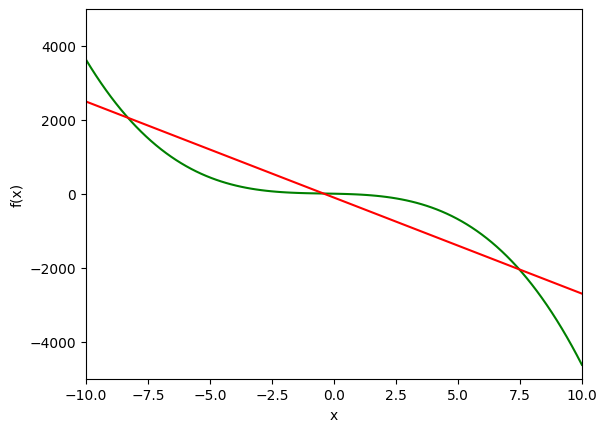

In [ ]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g')
plt.plot(dots, mean_prediction, color='r');

**Усреднение алгоритмов:**

- Не меняется смещение

- Разброс = $\frac{\text {разброс базового алгоритма}}{N} + \text {корреляция между базовыми алгоритмами}$


Есть два подхода, позволяющих уменьшить корреляцию:

* _бэггинг_ (обучение базовых алгоритмов на случайной подвыборке),
* _метод случайных подпространств_ (обучение базовых алгоритмов на случайном подмножестве признаков) или их комбинация.

### Бутстрап

Случайные леса названы так из-за того, что в процесс построения деревьев, из которых они состоят, внесен элемент случайности для обеспечения уникальности каждого из деревьев. Такая рандомизация заключается в обучении базовых алгоритмов на разных подвыборках обучающей выборки. Один из способов построения случайных подвыборок - _бутстрап (bootstrap)_. Этот метод заключается в получении из выборки длины $l$ нескольких разных выборок той же длины $l$. Для получения бутстрап-выборки из исходной выборки $l$ раз выбирается случайный элемент, причем каждый раз новый элемент выбирается из всей выборки. Таким образом, в полученной в конечном итоге бутстрап-выборке некоторые элементы исходной выборки будут встречаться несколько раз, а некоторые (примерно 37% выборки) будут вовсе отсутствовать, и при повторении $N$ раз мы получим $N$ разных выборок длиной $l$. Например, если у нас есть исходная выборка вида [a, b, c, d, e], возможными бутстрап-выборками могут быть [a, b, a, c, b] или [b, e, e, d, b] и т.д.

In [ ]:
# 5: x1, x2, x3, x4, x5

# 1: x2, x3, x2, x3, x1
# 2: x1, x5, x3, x3, x2
# 3: x3, x2, x2, x4, x5

<img src="https://drive.google.com/uc?id=1aaP68QfBk42FwV0vtGlPY5irAC7x0K9i" width=500px>

### Бэггинг

<img src="https://drive.google.com/uc?id=1YznY9Ng3YMyHiVN3pcLDfkSLPj_QZO9i" width=700px>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget 'https://drive.google.com/uc?id=1UyGD0iuIsO0Q7mBn8YY6lSuCc8r5MGzH' -O train.csv

--2024-08-26 07:47:15--  https://drive.google.com/uc?id=1UyGD0iuIsO0Q7mBn8YY6lSuCc8r5MGzH
Resolving drive.google.com (drive.google.com)... 64.233.187.113, 64.233.187.139, 64.233.187.101, ...
Connecting to drive.google.com (drive.google.com)|64.233.187.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1UyGD0iuIsO0Q7mBn8YY6lSuCc8r5MGzH [following]
--2024-08-26 07:47:15--  https://drive.usercontent.google.com/download?id=1UyGD0iuIsO0Q7mBn8YY6lSuCc8r5MGzH
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [application/octet-stream]
Saving to: ‘train.csv’

train.csv           100%[===================>] 449.88K  --.-KB/s    in 0.006s  

2024-08-26 07:47:18 (70.4 MB/s) - ‘tr

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['SalePrice', 'Id']),
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=42)
X_train.shape, X_test.shape

((1022, 79), (438, 79))

In [ ]:
categorials = X_train.select_dtypes('object').columns
categorials

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
X_train[categorials] = X_train[categorials].fillna('nan')
X_test[categorials] = X_test[categorials].fillna('nan')

In [ ]:
integer = X_train.select_dtypes(['int', 'float']).columns
X_train[integer].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
135,20,80.0,10400,7,6,1970,1970,288.0,0,0,...,530,98,0,0,0,0,0,0,5,2008
1452,180,35.0,3675,5,5,2005,2005,80.0,547,0,...,525,0,28,0,0,0,0,0,5,2006
762,60,72.0,8640,7,5,2009,2009,0.0,24,0,...,614,169,45,0,0,0,0,0,6,2010
932,20,84.0,11670,9,5,2006,2006,302.0,0,0,...,788,0,191,0,0,0,0,0,3,2007
435,60,43.0,10667,7,6,1996,1996,0.0,385,344,...,550,158,61,0,0,0,0,0,4,2009


In [ ]:
X_train[integer] = X_train[integer].fillna(-999)

X_test[integer] = X_test[integer].fillna(-999)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(X_train[categorials])

X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[categorials])
X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[categorials])

X_train = X_train.drop(categorials, axis=1)
X_test = X_test.drop(categorials, axis=1)

X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,20,80.0,10400,7,6,1970,1970,288.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1452,180,35.0,3675,5,5,2005,2005,80.0,547,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
762,60,72.0,8640,7,5,2009,2009,0.0,24,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
932,20,84.0,11670,9,5,2006,2006,302.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
435,60,43.0,10667,7,6,1996,1996,0.0,385,344,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,20,80.0,10400,7,6,1970,1970,288.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1452,180,35.0,3675,5,5,2005,2005,80.0,547,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
762,60,72.0,8640,7,5,2009,2009,0.0,24,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
932,20,84.0,11670,9,5,2006,2006,302.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
435,60,43.0,10667,7,6,1996,1996,0.0,385,344,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,20,70.0,8414,6,8,1963,2003,0.0,663,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1105,60,98.0,12256,8,5,1994,1995,362.0,1032,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
413,30,56.0,8960,5,6,1927,1950,0.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
522,50,50.0,5000,6,7,1947,1950,0.0,399,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1036,20,89.0,12898,9,5,2007,2008,70.0,1022,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
%%time
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)

dt.score(X_train, y_train), dt.score(X_test, y_test)

CPU times: user 135 ms, sys: 2.42 ms, total: 137 ms
Wall time: 441 ms


(1.0, 0.729824953535759)

In [ ]:
%%time
from sklearn.ensemble import BaggingRegressor

bag = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=1),
    n_estimators=100,
    max_samples=0.5,
    random_state=1
)

bag.fit(X_train, y_train)

bag.score(X_train, y_train), bag.score(X_test, y_test)

CPU times: user 3.29 s, sys: 2.71 ms, total: 3.3 s
Wall time: 4.51 s


(0.9306398026020526, 0.8841628921546731)

#### 🧠 Упражнение. Реализация своего бэггинга

1. Реализуем генерацию $N$ бутстрап-выборок.

In [ ]:
np.random.seed(42)

def get_bootstrap(data, labels, n_estimators, max_samples=1):
    n_samples = ...
    bootstrap = []

    for i in range(...):

        sample_index = ...
        b_data = data.iloc[sample_index]
        b_labels = labels.iloc[sample_index]

        bootstrap.append((b_data, b_labels))

    return bootstrap

In [ ]:
bootstrap = get_bootstrap(X_train, y_train, 2, max_samples=0.5)
bootstrap[0][0].shape, bootstrap[0][1].shape

((511, 298), (511,))

In [ ]:
bootstrap[0][0].index

Index([ 778,  530, 1254,  724, 1209,  931,  154, 1278, 1451,  903,
       ...
       1267, 1064, 1422,  933,  137,  944,  467, 1311,  345,  385],
      dtype='int64', length=511)

In [ ]:
bootstrap[1][0].shape, bootstrap[1][1].shape

((511, 298), (511,))

2. Обучите 10 моделей дерево решений на бутсрапированных выборках

In [ ]:
n_estimators = 10
bootstrap = get_bootstrap(X_train, y_train, n_estimators, max_samples=0.5)

models = []
for X_data, y_data in bootstrap:
    ...


models

[DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1)]

3. Сделайте предсказания 10 моделями дерево решений на тестовой выборке и оцените метрику качества

In [ ]:
preds = []
...

preds = np.array(preds)
print(preds.shape)


# сформируем список с предсказаниями для каждого объекта
preds_per_object = np.array(list(zip(*preds)))
print(preds_per_object.shape)


# сделаем итоговое предсказание для каждого объекта
bag_preds = []
...

bag_preds = np.array(bag_preds)
print(bag_preds.shape)

(10, 438)
(438, 10)
(438,)


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, bag_preds)

0.8494073059364861

##### 🧠 Упражнение (ответ). Реализация своего бэггинга

1. Реализуем генерацию $N$ бутстрап-выборок.

In [ ]:
np.random.seed(42)

def get_bootstrap(data, labels, n_estimators, max_samples=1):
    n_samples = int(data.shape[0] * max_samples)
    bootstrap = []

    for i in range(n_estimators):

        sample_index = np.random.randint(0, data.shape[0], size=n_samples)
        b_data = data.iloc[sample_index]
        b_labels = labels.iloc[sample_index]

        bootstrap.append((b_data, b_labels))

    return bootstrap

2. Обучите 10 моделей дерево решений на бутсрапированных выборках

In [ ]:
n_estimators = 10
bootstrap = get_bootstrap(X_train, y_train, n_estimators, max_samples=0.5)

models = []
for X_data, y_data in bootstrap:
    dt = DecisionTreeRegressor(random_state=1).fit(X_data, y_data)
    models.append(dt)


models

[DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1)]

3. Сделайте предсказания 10 моделями дерево решений на тестовой выборке и оцените метрику качества

In [ ]:
preds = []
for m in models:
    preds.append(m.predict(X_test))

preds = np.array(preds)
print(preds.shape)


# сформируем список с предсказаниями для каждого объекта
preds_per_object = np.array(list(zip(*preds)))
print(preds_per_object.shape)


# сделаем итоговое предсказание для каждого объекта
bag_preds = []
for obj in preds_per_object:
    bag_preds.append(np.mean(obj))

bag_preds = np.array(bag_preds)
print(bag_preds.shape)

(10, 438)
(438, 10)
(438,)


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, bag_preds)

0.831067074012353

### Метод случайных подпространств

<img src="https://drive.google.com/uc?id=1GkJA5-gy2KLuXAr_qDvHRomOEXdVR60x" width=700px>

In [ ]:
# f1, f2, f3, f4, f5
# n = 3

# 1: f1, f4, f3
# 2: f5, f3, f2
# 3: f4, f5, f3

## Алгоритм построения случайного леса <a class='anchor' id='alg'>

При построении случайного леса вначале генерируется количество бутстрап-выборок, равное количеству деревьев в алгоритме. Для уменьшения корреляции базовых алгоритмов рандомизируют сам процесс построения каждого дерева: если в стандартном методе построения деревьев мы в каждом узле выбираем $j$-й признак и порог $t$, с которым сравнивается его значение, и потом эти значения оптимизируются с помощью функции ошибки, то в методе случайного леса в каждой вершине $j$-й признак выбирается не из всего пространства признаков, а из его случайного подмножества размера $m$, __которое каждый раз выбирается заново__ (в этом отличие от метода случайных подпространств, где подпространство выбирается единожды и используется для построения всего дерева).

Есть некоторые практически рекомендации по построению случайных лесов: в задачах классификации рекомендуется брать $m = \sqrt{d}$, где $d$ - общее число признаков, и строить дерево до тех пор, пока в каждом листе не останется по одному объекту, а в задаче регрессии принимать $m = d/3$ и строить дерево, пока в листьях не останется по пять объектов.

Далее построенные деревья объединяются в композицию, и при предсказаниях с его помощью используется усредненный ответ на каждом дереве.

<img src="https://drive.google.com/uc?id=1dWN8F0AptShGSYDe_FSCZH-9bAX3ghkL" width=600px>


In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    random_state=10
)
rf.fit(X_train, y_train)

rf.score(X_train, y_train), rf.score(X_test, y_test)

CPU times: user 4.69 s, sys: 17.8 ms, total: 4.71 s
Wall time: 6.19 s


(0.9781271311879124, 0.892713116836979)

### 🧠 Упражнение: подбор параметров модели Random Forest

Переберите по 2-3 значения в параметрах:

1. n_estimators от 10 до 600
2. max_depth от 1 до 10
3. max_features от 0.1 до 1

Считайте метрику R2 по кросс-валидации на 5 фолдах.

Выберите самую лучшую модель.

#### 🧠 Упражнение: подбор параметров модели Random Forest (ответ)


In [ ]:
%%time
from sklearn.model_selection import GridSearchCV


params = {'n_estimators': [10, 100, 200],
          'max_depth': [2, 5, 9],
          'max_features': [0.1, 0.5, 1]}

rf = RandomForestRegressor(
    random_state=10
)

gs = GridSearchCV(
    rf, params,
    cv=5, scoring='r2',
    n_jobs=-1,
    verbose=10
)

gs.fit(X_train, y_train)

gs.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: user 5.57 s, sys: 258 ms, total: 5.83 s
Wall time: 1min 11s


{'max_depth': 9, 'max_features': 0.5, 'n_estimators': 200}

In [ ]:
stata = pd.DataFrame(gs.cv_results_)[
    ['param_max_depth', 'param_max_features', 'param_n_estimators',
     'mean_test_score', 'rank_test_score']
]
stata.sort_values('mean_test_score', ascending=False).head()

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,rank_test_score
23,9,0.5,200,0.825114,1
22,9,0.5,100,0.824304,2
20,9,0.1,200,0.823426,3
19,9,0.1,100,0.821281,4
18,9,0.1,10,0.808425,5


### Out-of-Bag <a class='anchor' id='oob'>
[Пример из sklearn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html) по OOB

Вспомним, что каждое дерево $b_{n}$, составляющее случайный лес, строится на основе бутстрапированной выборки $X_{n}$. При этом примерно 37% объектов не попадают в эту выборку, и дерево на них не обучается. Эти объекты можно использовать для оценки качества полученного алгоритма, это и называется _out-of-bag error_. Для каждого объекта $x_{i}$ мы можем найти деревья, которые на нем не обучались, и вычислить ошибку: она рассчитывается как сумма значений ошибки для среднего ответа на каждом объекте $x_{i}$ среди деревьев, которые на нем не обучались:

$$OOB = \frac{1}{l}\sum^{l}_{i=1}L\left ( y_{i}, \:\frac{1}{\sum^{N}_{n=1}[x_{i}\notin X_{n}]} \sum^{N}_{n=1}[x_{i} \notin X_{n}]b_{n}(x_{i}) \right ).$$

Здесь $L(y, z)$ - функция потерь, а выражение в скобках и представляет из себя среднюю ошибку на объекте $x_{i}$ среди деревьев, которые на нем не обучались.

In [ ]:
10 obj, 5 trees

TRAIN:
1 tree: 0, 1, 2, 3, 4, 5, 6, 4, 4, 4 - not train: 7, 8, 9
2 tree: 0, 6, 4, 3, 4, 4, 1, 2, 3, 3 - not train: 7, 8, 9, 5
3 tree:                              - not train: 1, 2, 3
4 tree:                              - not train: 2, 3, 4
5 tree:                              - not train: 4, 5, 6


TEST:
0 -
1 - 3 tree -> 0               | 0  | true 0
2 - 3 tree -> 1, 4 tree -> 1  | 1  | true 0
3 - 3 tree -> 0, 4 tree -> 1  | 1  | true 1
4 - 4 tree -> 1, 5 tree -> 1  | 1  | true 1
5 - 2 tree -> 0, 5 tree -> 0  | 0  | true 0
6 - 5 tree -> 1
7 -
8 -
9 -

При использовании этого метода оценивания качества исчезает необходимость использовать отложенные выборки и кросс-валидацию при обучении случайных лесов.

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    random_state=1,
    oob_score=True,
    **gs.best_params_
)
rf.fit(X_train, y_train)

rf.score(X_train, y_train), rf.score(X_test, y_test)

CPU times: user 3.64 s, sys: 7.85 ms, total: 3.65 s
Wall time: 3.86 s


(0.9677583229449703, 0.8957729194162081)

In [ ]:
rf.oob_score_

0.8320308476299493

#### 🧠 Упражнение. Реализация OOB ошибки

1. Обучите 3 модели дерево решений на бутстрапированных выборках

In [ ]:
n_estimators = 3
bootstrap = ...

models = []
for X_data, y_data in bootstrap:
    ...


models

[DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1)]

2. Создайте список с предсказаниями для каждого объекта

In [ ]:
from tqdm import tqdm

list_of_preds_lists = [[] for _ in range(len(X_train))]

for i, (X_data, y_data) in tqdm(enumerate(bootstrap)):
    # Получим индексы объектов с обучения
    train_indices = ...
    # Получим индексы для oob
    oob_indices = ...
    # Сделаем предсказания для каждого объекта с oob
    for idx in oob_indices:
        prediction = models[i].predict(...)
        list_of_preds_lists[idx].append(...)

list_of_preds_lists = np.array(list_of_preds_lists, dtype=object)
list_of_preds_lists

3it [00:42, 14.07s/it]


array([list([174000.0]), list([148000.0, 145000.0]),
       list([250580.0, 215200.0, 183200.0]), ...,
       list([131000.0, 112500.0, 131000.0]), list([144000.0, 132000.0]),
       list([193879.0])], dtype=object)

In [ ]:
oob_preds = []
y_true = []

# Получим итоговое предсказание бэггингом
# Если нет ни одного пресказания игнорируем объект
for i, preds in enumerate(list_of_preds_lists):
    if len(preds) > 0:
        oob_preds.append(...)
        y_true.append(...)


oob_preds = np.array(oob_preds)
y_true = np.array(y_true)
oob_preds.shape, y_true.shape

((977,), (977,))

3. Посчитайте метрику R2 на получившихся предсказаниях

In [ ]:
r2_score(y_true, oob_preds)

0.8469574702223701

##### 🧠 Упражнение (ответ). Реализация OOB ошибки

1. Обучите 3 модели дерево решений на бутстрапированных выборках

In [ ]:
n_estimators = 3
bootstrap = get_bootstrap(X_train, y_train, n_estimators, max_samples=0.5)

models = []
for X_data, y_data in bootstrap:
    dt = DecisionTreeRegressor(random_state=1).fit(X_data, y_data)
    models.append(dt)


models

[DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1),
 DecisionTreeRegressor(random_state=1)]

2. Создайте список с предсказаниями для каждого объекта

In [ ]:
from tqdm import tqdm

list_of_preds_lists = [[] for _ in range(len(X_train))]

for i, (X_data, y_data) in tqdm(enumerate(bootstrap)):
    # Получим индексы объектов с обучения
    train_indices = X_data.index
    # Получим индексы для oob
    oob_indices = list(set(range(len(X_train))) - set(train_indices))
    # Сделаем предсказания для каждого объекта с oob
    for idx in oob_indices:
        prediction = models[i].predict(X_train.iloc[[idx]])
        list_of_preds_lists[idx].append(prediction[0])

list_of_preds_lists = np.array(list_of_preds_lists, dtype=object)
list_of_preds_lists

3it [00:42, 14.07s/it]


array([list([174000.0]), list([148000.0, 145000.0]),
       list([250580.0, 215200.0, 183200.0]), ...,
       list([131000.0, 112500.0, 131000.0]), list([144000.0, 132000.0]),
       list([193879.0])], dtype=object)

In [ ]:
oob_preds = []
y_true = []

# Получим итоговое предсказание бэггингом
# Если нет ни одного пресказания игнорируем объект
for i, preds in enumerate(list_of_preds_lists):
    if len(preds) > 0:
        oob_preds.append(np.mean(preds))
        y_true.append(y_train.iloc[i])


oob_preds = np.array(oob_preds)
y_true = np.array(y_true)
oob_preds.shape, y_true.shape

((977,), (977,))

3. Посчитайте метрику R2 на получившихся предсказаниях

In [ ]:
r2_score(y_true, oob_preds)

0.8469574702223701

## **Дополнительные материалы**
1. Ансамбли в машинном обучении - https://dyakonov.org/2019/04/19/%D0%B0%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B8-%D0%B2-%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%BC-%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B8/
2. Ансамблевые методы: бэггинг, бустинг и стекинг - https://neurohive.io/ru/osnovy-data-science/ansamblevye-metody-begging-busting-i-steking/
3. Бэггинг и бутстрап + композиции в целом - https://habr.com/ru/company/ods/blog/324402/
4. Бэггинг и случайный лес - https://youtu.be/rawnIo_XtYY